<a href="https://colab.research.google.com/github/Sudeepa7/API/blob/main/Copy_of_Final_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Compressive Strength Of Concrete**

Dataset :

In [ ]:
# Import the necessary libaries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


# Supress future warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load data as a pandas dataframe

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Concrete_Data_Yeh.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [ ]:
df.shape

(1030, 9)

In [ ]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Exploraty data analysis
**Cement**

In [ ]:
#Quartiles
from scipy import stats
Q1 = df['cement'].quantile(q=0.25)
Q3 = df['cement'].quantile(q=0.75)
print('1st Quantile (Q1) is:',Q1)
print('3rd Quantile (Q3) is:',Q3)
print('Interquartile range (IQR) is',stats.iqr(df['cement']))

1st Quantile (Q1) is: 192.375
3rd Quantile (Q3) is: 350.0
Interquartile range (IQR) is 157.625


In [ ]:
#outlier detection from Interquartile range (IQR) in original data
L_outliers = Q1 - 1.5*(Q3-Q1)
U_outliers = Q3 + 1.5*(Q3-Q1)
print('Lower outliers limit in cement :',L_outliers)
print('Upper outliers limit in cement :',U_outliers)

Lower outliers limit in cement : -44.0625
Upper outliers limit in cement : 586.4375


In [ ]:
#Checking for presence of outliers with the upper and lower limit
print('Number of outliers in cement upper :',df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower :',df[df['cement']<-44.0625]['cement'].count())
#print('% of outliers in cement upper :',round(df[df['cement']>586.4375]['cement'].count()*100/len(df))

Number of outliers in cement upper : 0
Number of outliers in cement lower : 0


<Axes: xlabel='cement'>

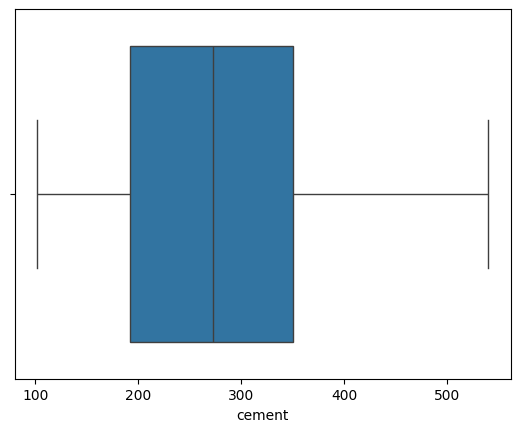

In [ ]:
#Distribution of Cement
sns.boxplot(x='cement',data=df,orient='h')

Text(0.5, 0.98, 'Cement Distribution')

<Figure size 1000x800 with 0 Axes>

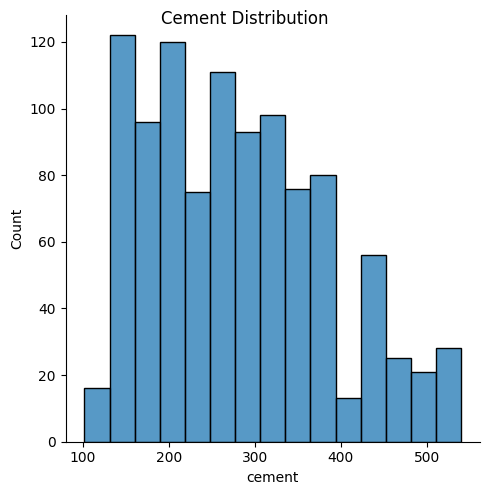

In [ ]:
plt.figure(figsize=(10,8))
sns.displot(df['cement']).fig.suptitle("Cement Distribution")
#plt.figure(figsize=(10,8))
#sns.displot(df['slag']).set_title("Slag Distribution")

**Water**

In [ ]:
#Quartiles
from scipy import stats
S_Q1 = df['water'].quantile(q=0.25)
S_Q3 = df['water'].quantile(q=0.75)
print('1st Quantile (Q1) is:',S_Q1)
print('3rd Quantile (Q3) is:',S_Q3)
print('Interquartile range (IQR) is',stats.iqr(df['water']))

1st Quantile (Q1) is: 164.9
3rd Quantile (Q3) is: 192.0
Interquartile range (IQR) is 27.099999999999994


In [ ]:
#outlier detection from Interquartile range (IQR) in original data
SL_outliers = S_Q1 - 1.5*(S_Q3-S_Q1)
SU_outliers = S_Q3 + 1.5*(S_Q3-S_Q1)
print('Lower outliers limit in slag :',SL_outliers)
print('Upper outliers limit in slag :',SU_outliers)

Lower outliers limit in slag : 124.25000000000001
Upper outliers limit in slag : 232.64999999999998


In [ ]:
#Checking for presence of outliers with the upper and lower limit
print('Number of outliers in slag upper :',df[df['water']>232.65]['water'].count())
print('Number of outliers in slag lower :',df[df['water']<124.25]['water'].count())

Number of outliers in slag upper : 4
Number of outliers in slag lower : 5


<Axes: xlabel='water'>

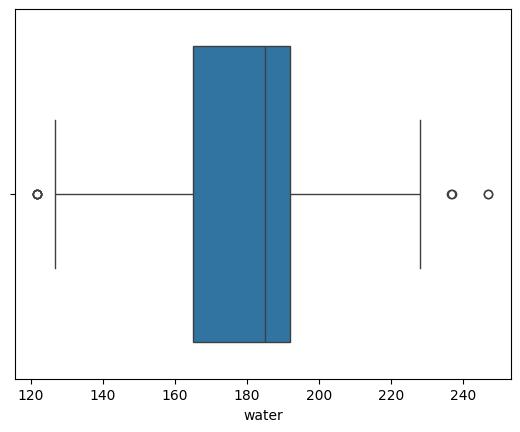

In [ ]:
#Distribution of Slag
sns.boxplot(x='water',data=df,orient='h')

Text(0.5, 0.98, 'Water Distribution')

<Figure size 1000x800 with 0 Axes>

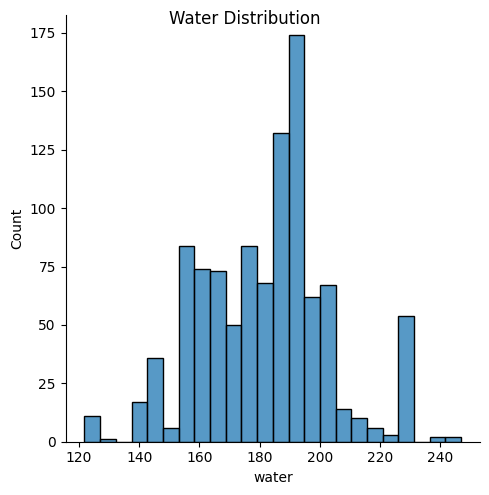

In [ ]:
plt.figure(figsize=(10,8))
sns.displot(df['water']).fig.suptitle("Water Distribution")

**MultiVariate Analysis**

<Axes: xlabel='csMPa', ylabel='Count'>

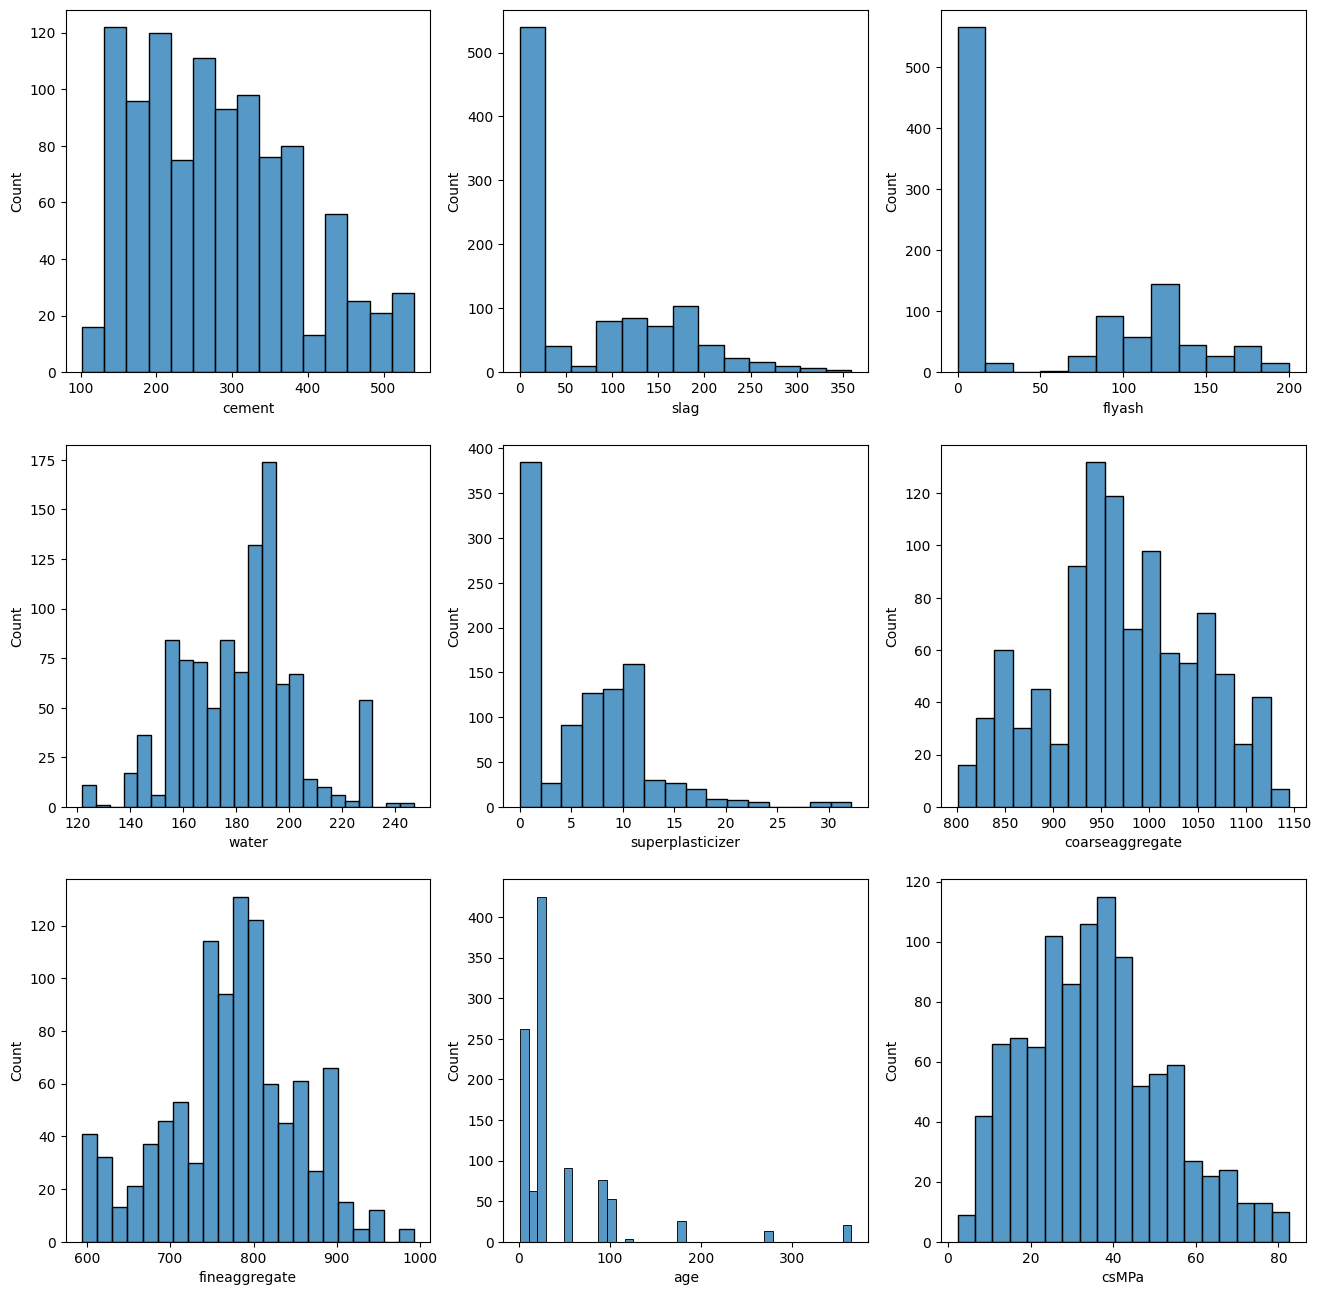

In [ ]:
#Distplot
fig, ax2 = plt.subplots(3,3,figsize=(16,16))
sns.histplot(df['cement'],ax=ax2[0][0])
sns.histplot(df['slag'],ax=ax2[0][1])
sns.histplot(df['flyash'],ax=ax2[0][2])
sns.histplot(df['water'],ax=ax2[1][0])
sns.histplot(df['superplasticizer'],ax=ax2[1][1])
sns.histplot(df['coarseaggregate'],ax=ax2[1][2])
sns.histplot(df['fineaggregate'],ax=ax2[2][0])
sns.histplot(df['age'],ax=ax2[2][1])
sns.histplot(df['csMPa'],ax=ax2[2][2])

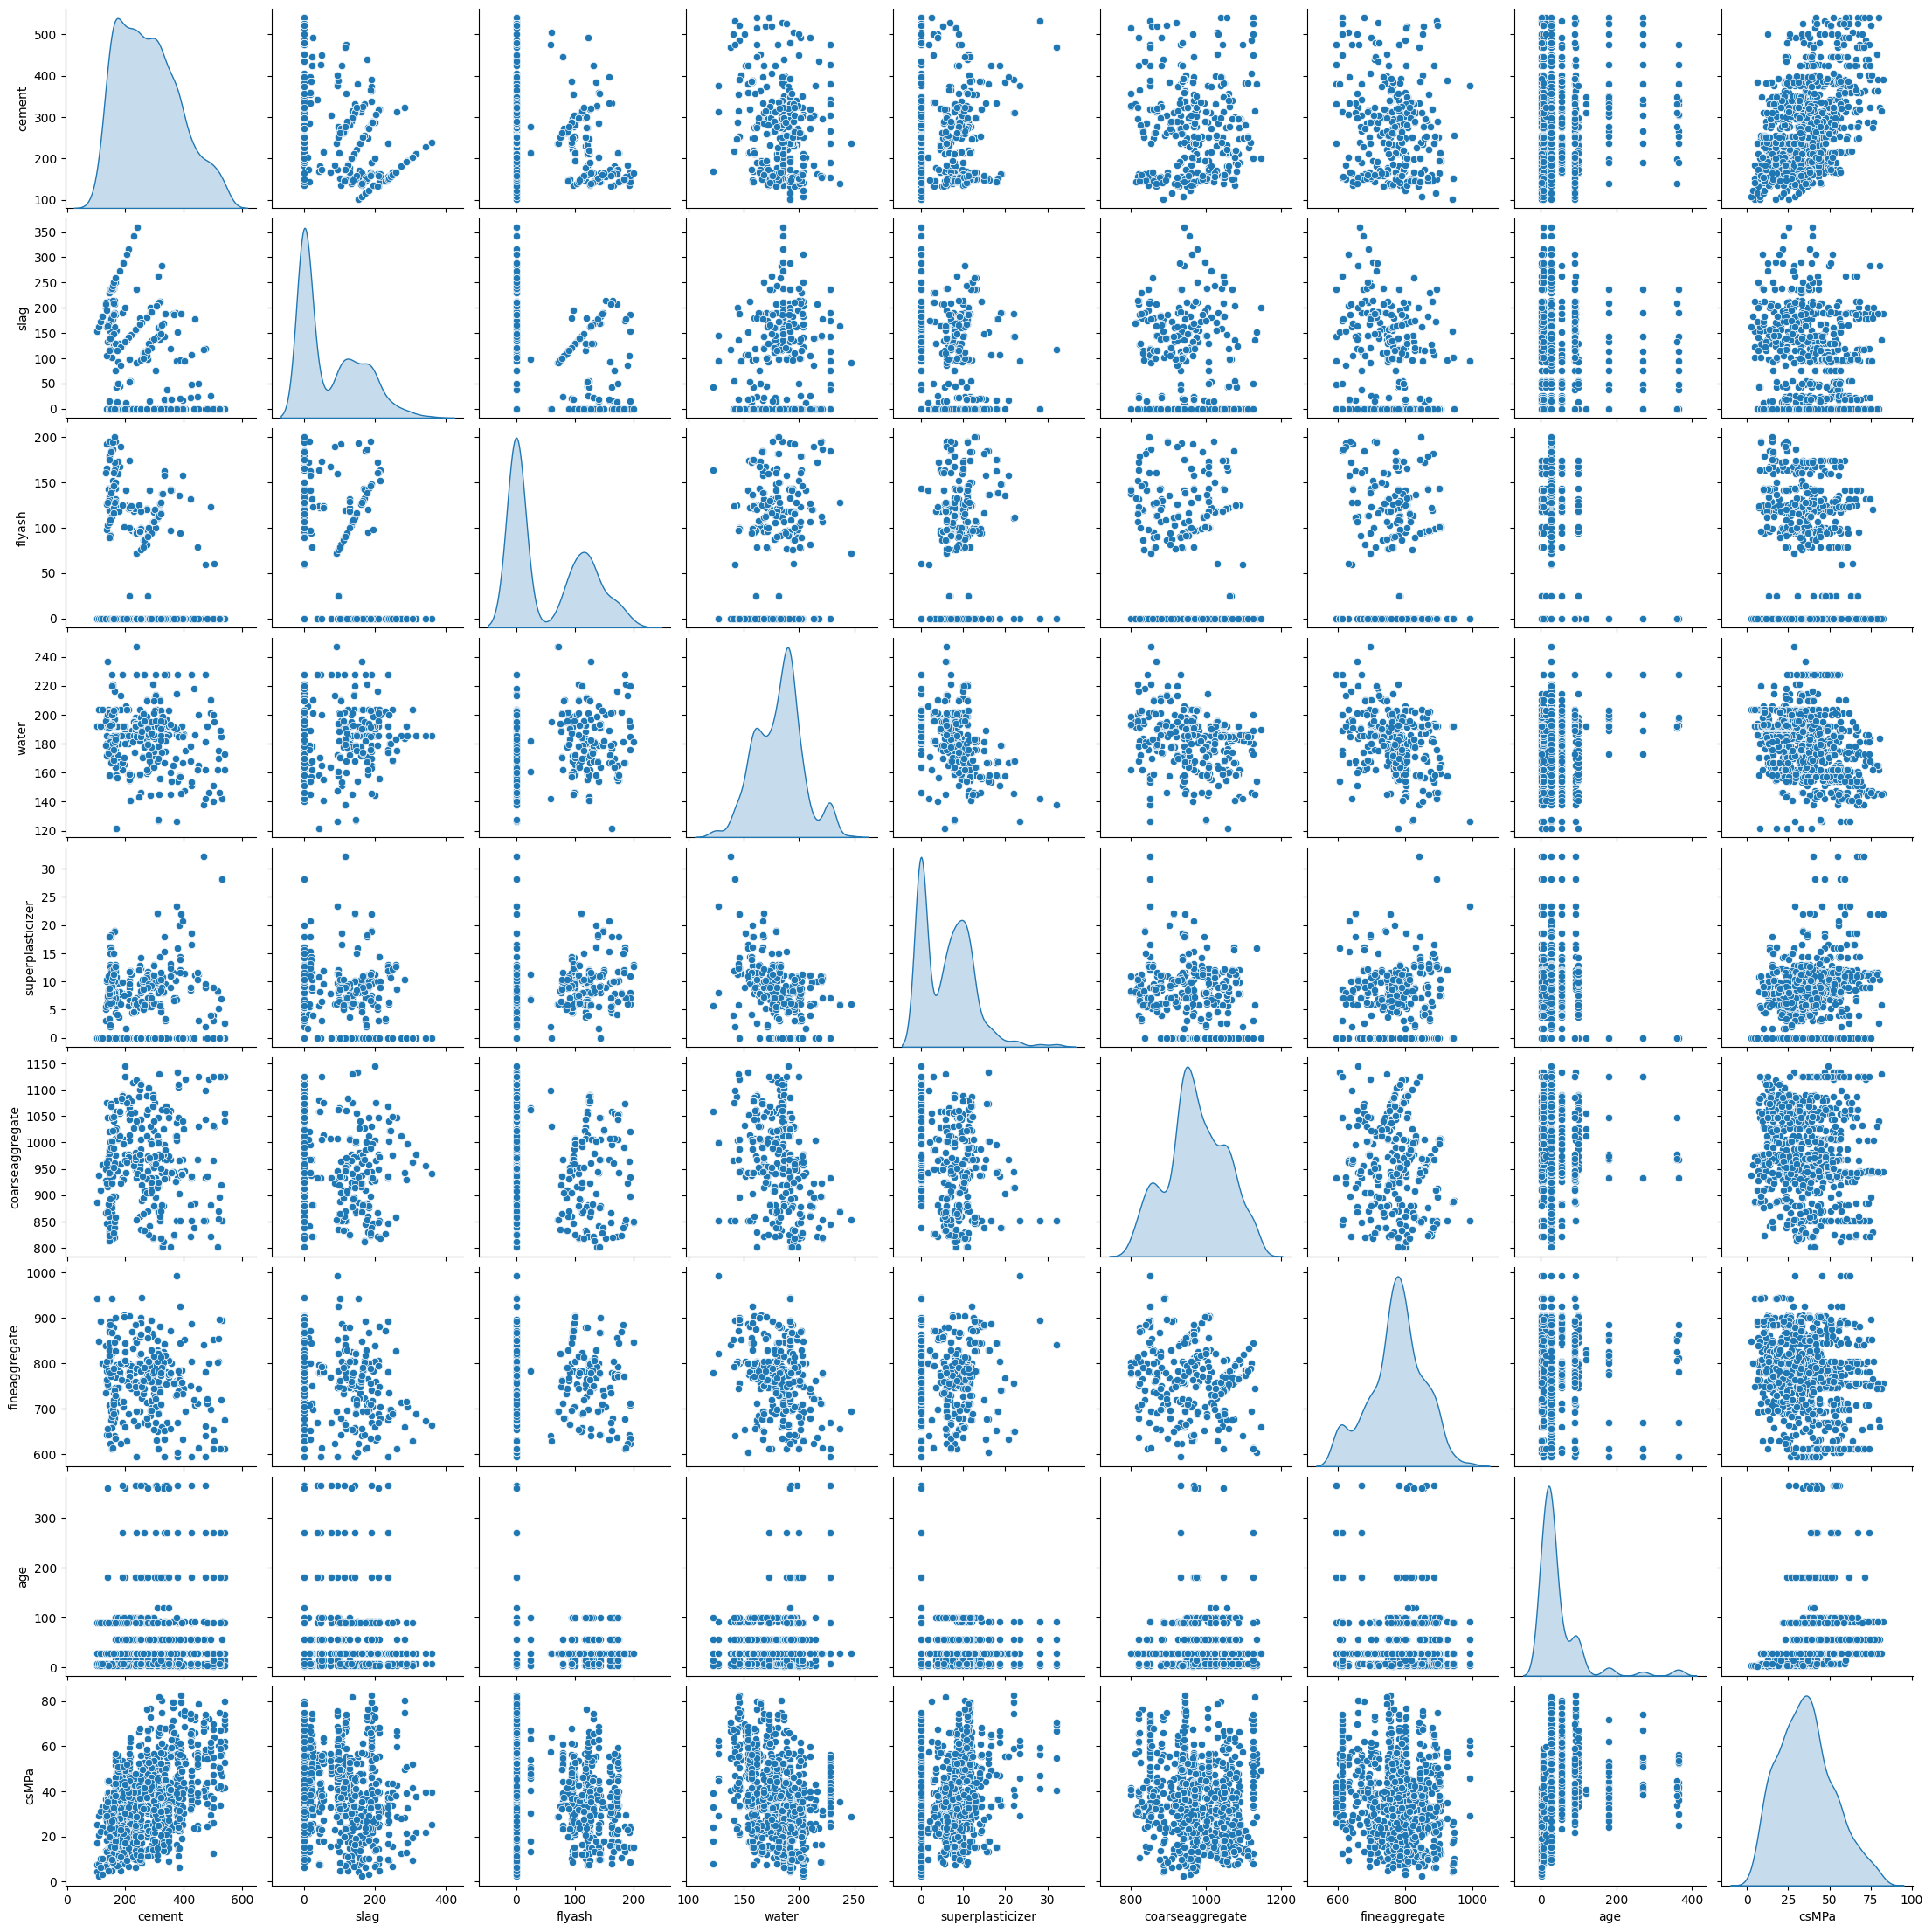

In [ ]:
# Pairplot with density curves on the diagonal
sns.pairplot(df, diag_kind='kde')

# Show the plot
plt.show()

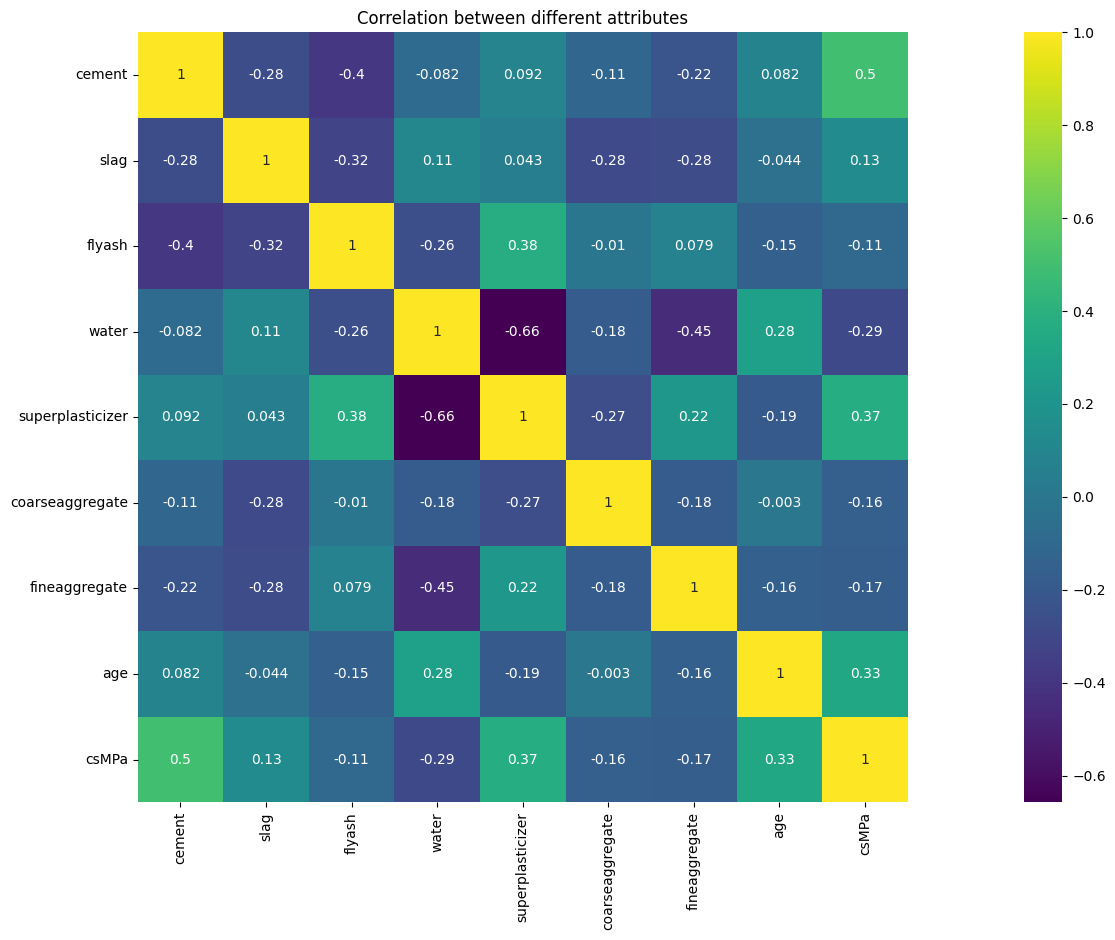

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<Axes: >

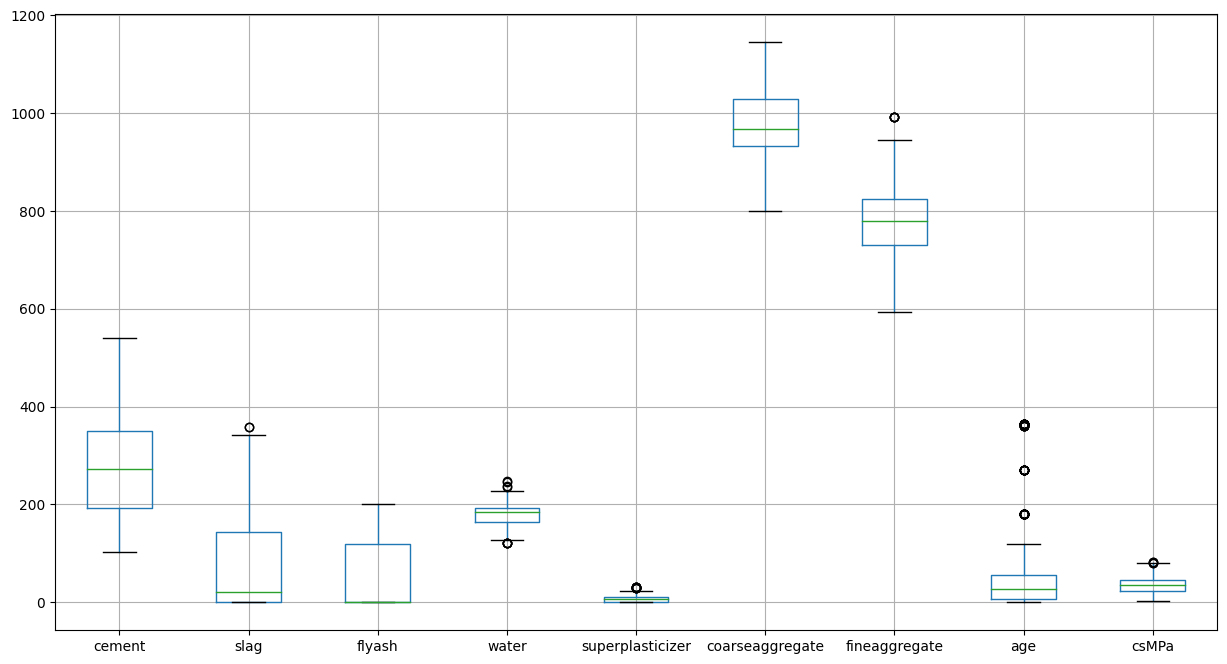

In [ ]:
df.boxplot(figsize=(15,8))

In [ ]:
print("Outliers in cement :", df.loc[((df['cement'] - df['cement'].mean()) / df['cement'].std()).abs() > 3, 'cement'].count())
print("Outliers slag :", df.loc[((df['slag'] - df['slag'].mean()) / df['slag'].std()).abs() > 3, 'slag'].count())
print("Outliers flyash :", df.loc[((df['flyash'] - df['flyash'].mean()) / df['flyash'].std()).abs() > 3, 'flyash'].count())
print("Outliers water :", df.loc[((df['water'] - df['water'].mean()) / df['water'].std()).abs() > 3, 'water'].count())
print("Outliers superplasticizer :", df.loc[((df['superplasticizer'] - df['superplasticizer'].mean()) / df['superplasticizer'].std()).abs() > 3, 'superplasticizer'].count())
print("Outliers coarseaggregate :", df.loc[((df['coarseaggregate'] - df['coarseaggregate'].mean()) / df['coarseaggregate'].std()).abs() > 3, 'coarseaggregate'].count())
print("Outliers fineaggregate :", df.loc[((df['fineaggregate'] - df['fineaggregate'].mean()) / df['fineaggregate'].std()).abs() > 3, 'fineaggregate'].count())
print("Outliers age :", df.loc[((df['age'] - df['age'].mean()) / df['age'].std()).abs() > 3, 'age'].count())
#print("Outliers csMPa :", df.loc[((df['csMPa'] - df['csMPa'].mean()) / df['csMPa'].std()).abs() > 3, 'csMPa'].count())

Outliers in cement : 0
Outliers slag : 4
Outliers flyash : 0
Outliers water : 2
Outliers superplasticizer : 10
Outliers coarseaggregate : 0
Outliers fineaggregate : 0
Outliers age : 33


**Replacing the outliers by mean**

In [ ]:
for cols in df.columns[:-1]:

  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  df.loc[(df[cols] < low)|(df[cols] > high),cols] = df[cols].median()

<Axes: >

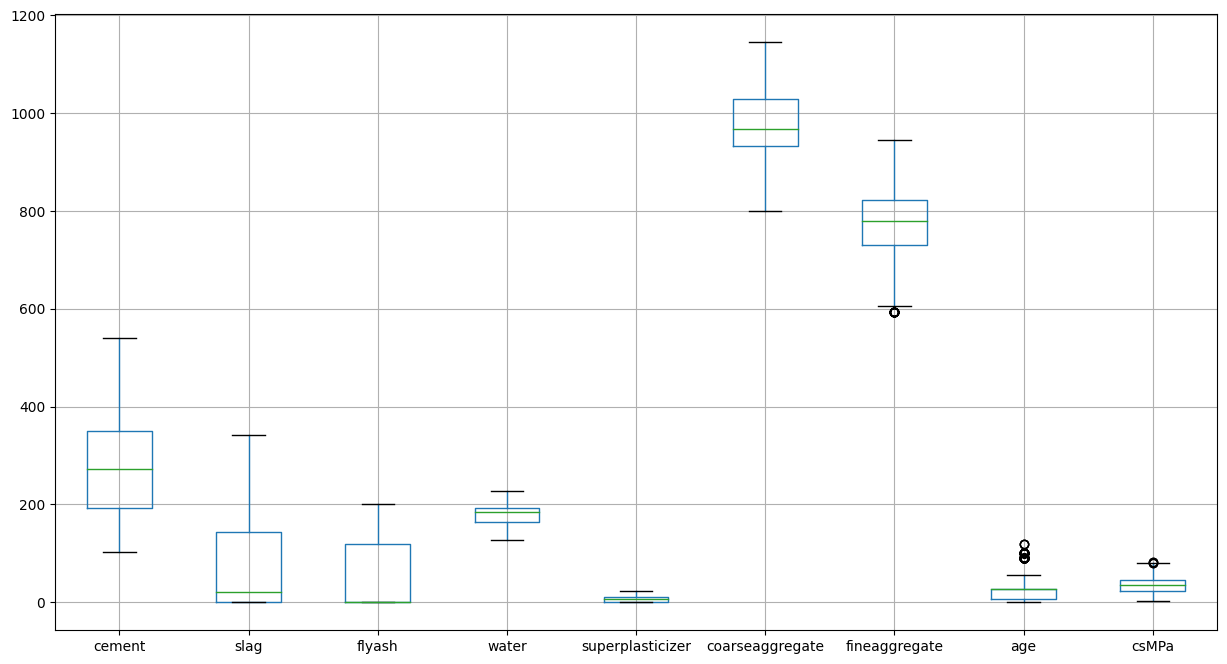

In [ ]:
df.boxplot(figsize=(15,8))

**Feature Engineering and Model Building**

In [ ]:
df.head()


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [ ]:
#strength - Y - dependant varable other variables should be independant
#splitting the data into independent and dependent attributes

#independent and dependent variables

X = df.drop('csMPa',axis=1)
y = df['csMPa']

In [ ]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled,columns = df.columns)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(Xscaled , y , test_size = 0.3 , random_state = 1)

**Building Diffferent Models**

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([22.891     , 12.71      , 23.2936    , 12.52      , 32.28134762,
       62.5528    , 20.4949    , 49.3947531 , 40.96161667, 19.0969    ,
       37.4045    , 13.3275    , 39.697375  , 32.42183333, 11.9104    ,
       28.6494    , 34.86833583, 54.3285    , 59.1701    , 29.4968    ,
       25.7956    , 51.551     , 15.772     , 59.097     , 62.132675  ,
       43.1421    , 35.48386667, 32.2196    , 34.99446667, 12.726     ,
       39.68388333, 51.018825  , 28.81257857, 19.8271    , 35.1289    ,
       37.741     , 15.3438    , 27.95955   , 24.4208    , 11.5068    ,
       30.5034    , 15.4952    , 45.77924667, 38.49506167, 30.5804    ,
       28.2214    , 33.24065   , 24.7129    , 33.20505   , 49.8002    ,
       26.93495667, 35.46646667, 61.8909    , 54.285     , 60.238125  ,
        9.2867    , 29.4286    , 23.1838    , 31.8081    , 43.4699    ,
       45.75459369, 39.91095   , 49.2918    , 49.4972    , 27.86916   ,
       34.92598333, 61.8909    , 36.97      , 47.94040667, 27.93

In [ ]:
#model performance on training data
model.score(X_train,y_train)

0.9812168789154412

In [ ]:
#model performance on test data
model.score(X_test,y_test)

0.8790458157166601

In [ ]:
from sklearn.metrics import r2_score

acc_R = sklearn.metrics.r2_score(y_test, y_pred)
acc_R

0.8790458157166601

In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming you have y_test and y_pred defined
mse = mean_squared_error(y_test, y_pred)
mse

31.702962451458795

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparition
results_1 = pd.DataFrame({'Algorithm':['Random Forest'],'Accuracy': [acc_R]},index = ['1'])
results = results_1[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random Forest,0.879046


**KFold cross validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

K = 20

kfold = KFold(n_splits=K)
K_results = cross_val_score(model, X, y, cv=kfold)
accuracy = np.mean(abs(K_results))

#print(K_results)
accuracy

0.7605741294574129

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparition
random_re = pd.DataFrame({'Algorithm':['Random Forest Regressor k_fold'],'Accuracy': [accuracy]},index = ['2'])
results = pd.concat([results,random_re])
results = results[['Algorithm','Accuracy']]
results = results.drop_duplicates(subset=['Algorithm'], keep='last')
results
#results = results.drop(results.index[2])

,Algorithm,Accuracy
1,Random Forest,0.879046
2,Random Forest Regressor k_fold,0.760574
